In [ ]:
# installing dependencies
# !pip install yfinance

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 19.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 23.4 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15548 sha256=d07a94a098026e6afda76385eb342ccf691a3dd3118f7890082aed12d1be10a1
  Stored in directory: /Users/gulamizibrahimi/Library/Caches/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-macosx_11_0_arm64.whl size=264357 sha256=b48a1b83c07ace491c3b50187519ec84868c54da2fb2074e09fda48350f8960b
  Stored in directory: /Users/gulamizibrahimi/Library/Caches/pip/wheels/d1/df/a9/0202b051c65b11c992dd6db9f2babdd2c44ec7d35d511be5d3
Successfully built multitasking peewee


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [23]:
start = '2012-01-01'
end = '2022-12-21'

stock = 'GOOG'

# Fetching the stock data
data = yf.download(stock, start=start, end=end)


/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_12102/1197193976.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [24]:
data.reset_index(inplace=True)

In [25]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475197,16.543039,16.152333,16.166447,147611217
1,2012-01-04,16.546259,16.595036,16.356602,16.465791,114989399
2,2012-01-05,16.316736,16.439543,16.247905,16.393986,131808205
3,2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.746811,96.645528,93.384911,94.975455,26452900
2757,2022-12-15,90.661095,93.474374,89.895648,92.987272,28298800
2758,2022-12-16,90.323105,91.207845,89.478129,90.661092,48485500


In [26]:
ma_100_days = data.Close.rolling(100).mean()

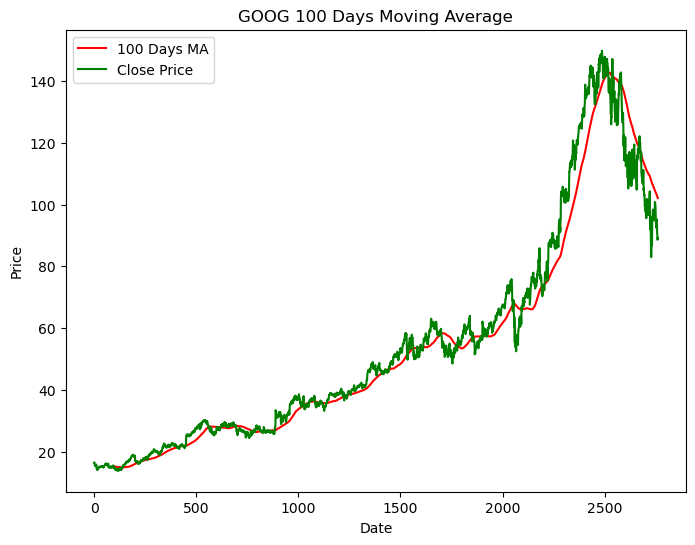

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.title(f'{stock} 100 Days Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['100 Days MA', 'Close Price'])
plt.show()

In [28]:
ma_200_days = data.Close.rolling(200).mean()

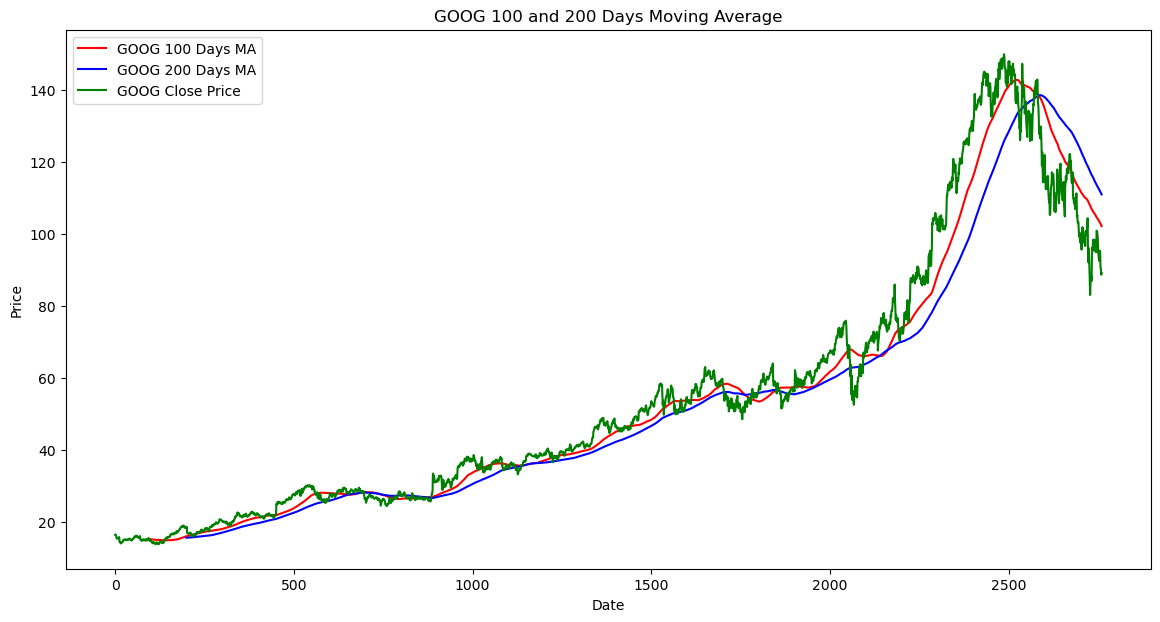

In [29]:
plt.figure(figsize=(14, 7))
plt.plot(ma_100_days, label='GOOG 100 Days MA', color='red')
plt.plot(ma_200_days, label='GOOG 200 Days MA', color='blue')
plt.plot(data.Close, label='GOOG Close Price', color='green')
plt.title(f'{stock} 100 and 200 Days Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
data.dropna(inplace=True)

In [ ]:
# Splitting the data into training and testing sets
# 80% for training and 20% for testing
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
# Checking the number of rows in the test set
data_train.shape[0]

2208

In [ ]:
# Checking the number of rows in the training set
data_test.shape[0]

553

In [ ]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
# Scaling the training data
data_train_scale = scaler.fit_transform(data_train)

In [40]:
# Preparing the data for LSTM model
# Creating sequences of 100 time steps
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i, 0])


In [ ]:
# Converting to numpy arrays
x, y = np.array(x), np.array(y)

In [ ]:
# installing keras
# !pip install keras

# installing tensorflow
#!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 22.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 18.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 18.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.6 MB/s eta 0:00:00a 0:00:01


In [ ]:
# Importing necessary libraries for LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
## Building the LSTM model 
model = Sequential()

# Adding the LSTM layers
# The first LSTM layer with 50 units and relu activation function
# The return_sequences parameter is set to True to return the full sequence
# The input_shape parameter is set to the shape of the input data
# which is (number of time steps, number of features)
# The Dropout layer is added to prevent overfitting
# with a dropout rate of 0.2

model.add(LSTM(units=50, activation='relu', return_sequences=True, 
            input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True,))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Adding the output layer
model.add(Dense(units=1))



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compiling the model because we need to specify the optimizer and loss function
model.compile(optimizer='adam', loss='mean_squared_error')

In [51]:
# Fitting the model to the training data
# The model is trained for 50 epochs with a batch size of 32
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step - loss: 0.0288
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - loss: 0.0067
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - loss: 0.0056
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - loss: 0.0058
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - loss: 0.0050
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - loss: 0.0045
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 211ms/step - loss: 0.0045
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - loss: 0.0042
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 224ms/step - loss: 0.0042
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - loss: 0.0039
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 212ms/step - loss: 0.0044
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 206ms/step - loss: 0.0036
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 210ms/step - loss: 0.0035
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0037
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 

In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [53]:
past_100_days = data_train.tail(100)

In [54]:
data_test = pd.concat([past_100_days, data_test], ignore_index=True)

In [73]:
data_test_scale = scaler.fit_transform(data_test)

In [74]:
# Preparing the data for LSTM model
# Creating sequences of 100 time steps
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])

x, y = np.array(x), np.array(y)


In [60]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


In [66]:
scale = 1/scaler.scale_ # This will give us the scale factor used for scaling the data

In [67]:
y_predict = y_predict*scale

In [68]:
y = y*scale

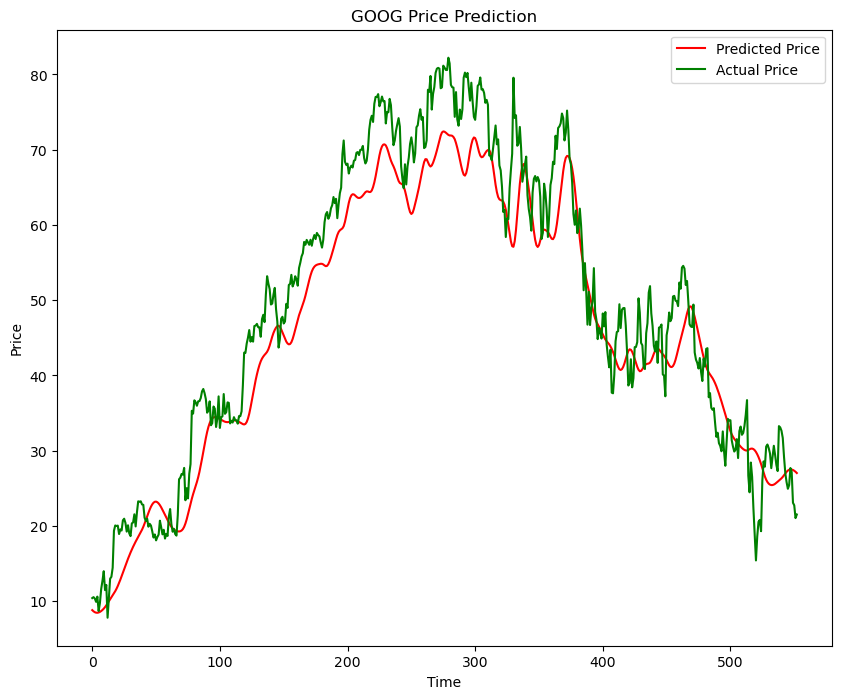

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Actual Price')
plt.title(f'{stock} Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend() # legend() is a function to show the legend on the plot, the legend is used to identify the different lines in the plot
plt.show()

In [70]:
model.save('Stock Prediction Model.keras')  # Saving the model